In [1]:
import numpy as np
import pandas as pd

In [2]:
train_dataset = r"./match_history.csv"
df = pd.read_csv(train_dataset)
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,2004-09-03,Spain,Scotland,Europe,Europe,3,67,0,0,1,...,No,Draw,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8
1,2004-09-04,Albania,Greece,Europe,Europe,94,14,0,0,2,...,No,Win,NaN,90.0,NaN,59.0,74.5,82.8,83.7,85.2
2,2004-09-04,Austria,England,Europe,Europe,90,7,0,0,2,...,No,Draw,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2
3,2004-09-04,Croatia,Hungary,Europe,Europe,25,76,0,0,3,...,No,Win,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2
4,2004-09-04,Denmark,Ukraine,Europe,Europe,15,87,0,0,1,...,No,Draw,82.0,NaN,79.5,85.0,81.5,NaN,81.7,65.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,2021-12-07,Algeria,Egypt,Africa,Africa,32,45,1508,1449,1,...,No,Draw,78.0,NaN,78.0,81.0,78.0,NaN,79.3,70.8
5637,2021-12-08,Mexico,Chile,North America,South America,14,24,1638,1541,2,...,No,Draw,80.0,79.0,76.8,82.7,78.2,75.5,76.7,78.2
5638,2021-12-11,Morocco,Algeria,Africa,Africa,28,32,1525,1508,2,...,Yes,Lose,82.0,78.0,81.2,81.7,76.2,78.0,81.0,78.0
5639,2021-12-18,Tunisia,Algeria,Africa,Africa,29,32,1512,1508,0,...,No,Lose,NaN,78.0,70.8,72.3,74.0,78.0,81.0,78.0


In [3]:
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,2004-09-03,Spain,Scotland,Europe,Europe,3,67,0,0,1,...,No,Draw,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8
1,2004-09-04,Albania,Greece,Europe,Europe,94,14,0,0,2,...,No,Win,NaN,90.0,NaN,59.0,74.5,82.8,83.7,85.2
2,2004-09-04,Austria,England,Europe,Europe,90,7,0,0,2,...,No,Draw,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2
3,2004-09-04,Croatia,Hungary,Europe,Europe,25,76,0,0,3,...,No,Win,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2
4,2004-09-04,Denmark,Ukraine,Europe,Europe,15,87,0,0,1,...,No,Draw,82.0,NaN,79.5,85.0,81.5,NaN,81.7,65.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,2021-12-07,Algeria,Egypt,Africa,Africa,32,45,1508,1449,1,...,No,Draw,78.0,NaN,78.0,81.0,78.0,NaN,79.3,70.8
5637,2021-12-08,Mexico,Chile,North America,South America,14,24,1638,1541,2,...,No,Draw,80.0,79.0,76.8,82.7,78.2,75.5,76.7,78.2
5638,2021-12-11,Morocco,Algeria,Africa,Africa,28,32,1525,1508,2,...,Yes,Lose,82.0,78.0,81.2,81.7,76.2,78.0,81.0,78.0
5639,2021-12-18,Tunisia,Algeria,Africa,Africa,29,32,1512,1508,0,...,No,Lose,NaN,78.0,70.8,72.3,74.0,78.0,81.0,78.0


In [4]:
avg_df = df[[
    "date", 
    "home_team", "away_team", 
    "home_team_fifa_rank", "away_team_fifa_rank",  
    'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
    'home_team_mean_defense_score', 'home_team_mean_offense_score',
    'home_team_mean_midfield_score', 'away_team_mean_defense_score',
    'away_team_mean_offense_score', 'away_team_mean_midfield_score',
    'home_team_result',
    ]].copy()

avg_df["home_team_result"] = avg_df["home_team_result"].replace(['Lose', 'Draw', 'Win'], [-1, 0, 1])


home_score = [
    'home_team_goalkeeper_score', 
    'home_team_mean_defense_score', 
    'home_team_mean_offense_score',
    'home_team_mean_midfield_score',
]

for team in avg_df["home_team"].unique():
    team_index = avg_df["home_team"] == team
    avg_df.loc[team_index, home_score] = avg_df.loc[team_index, home_score].expanding().mean()

away_score = [
    'away_team_goalkeeper_score',
    'away_team_mean_defense_score',
    'away_team_mean_offense_score', 
    'away_team_mean_midfield_score',
]

for team in avg_df["away_team"].unique():
    team_index = avg_df["away_team"] == team
    avg_df.loc[team_index, away_score] = avg_df.loc[team_index, away_score].expanding().mean()

avg_df

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_result
0,2004-09-03,Spain,Scotland,3,67,94.000000,84.000000,86.500000,89.300000,89.500000,80.200000,79.700000,81.800000,0
1,2004-09-04,Albania,Greece,94,14,NaN,90.000000,NaN,59.000000,74.500000,82.800000,83.700000,85.200000,1
2,2004-09-04,Austria,England,90,7,83.000000,88.000000,76.200000,73.000000,74.000000,90.500000,88.700000,91.200000,0
3,2004-09-04,Croatia,Hungary,25,76,77.000000,74.000000,80.500000,78.700000,79.000000,71.800000,75.700000,70.200000,1
4,2004-09-04,Denmark,Ukraine,15,87,82.000000,NaN,79.500000,85.000000,81.500000,NaN,81.700000,65.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,2021-12-07,Algeria,Egypt,32,45,69.075000,70.875000,74.150000,75.188679,75.264151,70.544444,72.581818,73.051724,0
5637,2021-12-08,Mexico,Chile,14,24,79.080000,77.621622,76.967333,78.964667,77.759333,74.387719,78.812174,79.827826,0
5638,2021-12-11,Morocco,Algeria,28,32,71.635135,70.242424,75.937838,76.932432,76.870270,74.262791,75.756818,75.945455,-1
5639,2021-12-18,Tunisia,Algeria,29,32,64.212121,70.470588,72.319643,71.008929,73.035714,74.347727,75.873333,75.991111,-1


In [5]:
from sklearn.model_selection import train_test_split

X = avg_df[[
       'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'
]]
y = avg_df["home_team_result"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

Accuracy: 0.5641389085754784


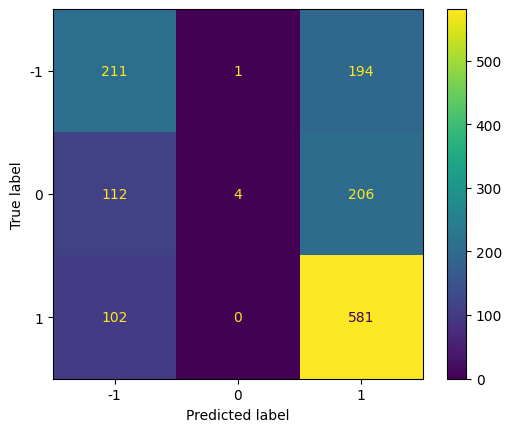

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'), StandardScaler(), SVC(gamma='auto'))
model.fit(X, y)

predictions = model.predict(X_test)
print("Accuracy:", np.mean((np.array(y_test) == predictions)))
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot();

## Baseline models

In [61]:
from collections import Counter

### Logistic regression
The logistic regression estimator does not accept NaN values - replace them with 0

In [62]:
from sklearn.linear_model import LogisticRegression


X = X.fillna(0)     # Replace NaN values with 0
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y)

def train_logistic_regression_model():
    lr_model = LogisticRegression(random_state=0, max_iter=500).fit(X_train_lr, y_train_lr)
    lr_predictions = lr_model.predict(X_test_lr)

    print(f"{'LR Predictions':20s}: {Counter(lr_predictions)}")
    return np.mean(lr_predictions == y_test_lr.values)*100

### Support vector machines

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

    
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y)

def train_svm_model():
    # Polynomial kernel (1+x.T.y)^p
    svm_model = make_pipeline(StandardScaler(), SVC(kernel='poly')).fit(X_train_svm, y_train_svm)
    svm_predictions = svm_model.predict(X_test_svm)

    print(f"{'SVM Predictions':20s}: {Counter(svm_predictions)}")
    return np.mean(svm_predictions == y_test_svm.values)*100

### K-nearest neighbour

In [64]:
from sklearn.neighbors import KNeighborsClassifier


X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y)

def train_knn_model(neighbours=5):
    knn_model = KNeighborsClassifier(n_neighbors=neighbours).fit(X_train_knn, y_train_knn)
    knn_predictions = knn_model.predict(X_test_knn)

    print(f"{'KNN Predictions':20s}: {Counter(knn_predictions)}")
    return np.mean(knn_predictions == y_test_knn.values)*100

### Performance comparison of baseline models
Since the weights of each model are initialized randomly, we take an average performance of each model for fairness.

In [68]:
lr_predictions = train_logistic_regression_model()
svm_predictions = train_svm_model()
knn_predictions = train_knn_model()

print(f"{'LR model accuracy':20s}: {lr_predictions:.2f}%")
print(f"{'SVM model accuracy':20s}: {svm_predictions:.2f}%")
print(f"{'KNN model accuracy':20s}: {knn_predictions:.2f}%")

LR Predictions      : Counter({1: 963, -1: 448})
SVM Predictions     : Counter({1: 1195, -1: 194, 0: 22})
KNN Predictions     : Counter({1: 618, -1: 536, 0: 257})
LR model accuracy   : 54.64%
SVM model accuracy  : 51.74%
KNN model accuracy  : 46.14%


### Simple analysis
- LR doesn't predict drawed matches at all
- SVM is biased towards predicting wins

In [70]:
Counter(y_test)

Counter({1: 683, -1: 406, 0: 322})